In [1]:
%pylab inline
from pandas import Series, DataFrame
from pandas_datareader.data import DataReader
from wallet.core import create_app
from wallet.model.m1 import M1Portfolio
from wallet.util.analysis import _moving_average_statistics
app = create_app(compact=True)

Populating the interactive namespace from numpy and matplotlib


/Users/che/.local/share/virtualenvs/portfolio_analysis-cXHJLPF2/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
[2020-02-14 20:07:04,272] INFO in core: Started 


,count,mean,std,min,25%,50%,75%,max,shrp,yield,down,skew
IRA,50.0,0.331814,0.334587,-0.651963,0.199151,0.318351,0.547256,1.050829,0.967993,17.538627,4.030486,-0.557460
S&P 500,50.0,0.154347,0.237555,-0.510550,0.041914,0.204841,0.302752,0.639140,0.616321,8.017012,3.078777,-0.822472
M1,50.0,0.077626,0.206202,-0.469016,-0.001265,0.143496,0.190518,0.467610,0.337965,3.723123,3.225981,-0.957851
Alibaba,50.0,0.214825,0.671251,-1.987437,-0.074720,0.346826,0.629024,1.260611,0.308214,12.804319,10.851265,-1.056121
CSI 300,50.0,0.065474,0.806869,-2.366262,-0.166757,0.309967,0.586249,1.403792,0.071310,2.294627,15.608808,-1.240724


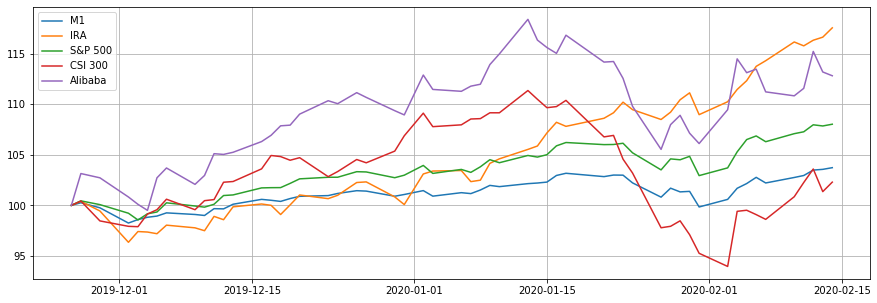

In [2]:
with app.app_context():
    m1 = Series({d: v for d, v, *_ in M1Portfolio.net_value_series('Individual', 55)})
    ira = Series({d: v for d, v, *_ in M1Portfolio.net_value_series('Roth IRA', 55)})
data = DataReader(['SPY', 'ASHR', 'BABA'], 'yahoo', m1.index[0])['Adj Close']
frame = DataFrame({
    'M1': m1,
    'IRA': ira,
    'S&P 500': data['SPY'],
    'CSI 300': data['ASHR'],
    'Alibaba': data['BABA'],
}).dropna()
for key in frame.columns:
    frame[key] *= 100 / frame[key][0]
frame.plot(figsize=(15, 5), grid=1)
_moving_average_statistics(frame, 5)

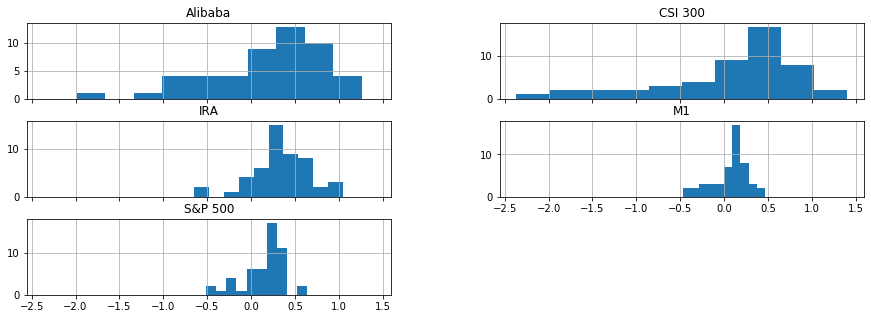

In [3]:
ret = frame.rolling(5).mean().pct_change() * 100
_ = ret.hist(sharex=1, figsize=(15, 5), layout=(3, 2))